In [18]:
!sudo apt-get install -y libsndfile1-dev ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1-dev is already the newest version (1.0.28-7ubuntu0.1).
ffmpeg is already the newest version (7:4.2.4-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 139 not upgraded.


In [8]:
%pip install numpy matplotlib librosa youtube-dl sndfile soundfile

You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!youtube-dl -f 251 Rh830QhsnSQ buimPG01gcs

[youtube] Rh830QhsnSQ: Downloading webpage
[youtube] Rh830QhsnSQ: Downloading MPD manifest
[download] Destination: 🎹 Gama Do major (tutorial pian cu note + digitație)-Rh830QhsnSQ.webm
[download] 100% of 2.41MiB in 00:2943KiB/s ETA 00:008
[youtube] buimPG01gcs: Downloading webpage
[download] Destination: Tuning Note - A-buimPG01gcs.webm
[download] 100% of 340.37KiB in 00:0500KiB/s ETA 00:00


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import librosa
import librosa.display
import IPython.display
import soundfile as sf

In [3]:
%%time
talk_samples, sample_rate = librosa.load('🎹 Gama Do major (tutorial pian cu note + digitație)-Rh830QhsnSQ.webm')
assert sample_rate == 22050

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CPU times: user 6.31 s, sys: 432 ms, total: 6.74 s
Wall time: 6.98 s


In [4]:
print(talk_samples.shape)  # wypisywanie
talk_samples  # ostatnia linijka jest wyświetlana bez jawnego print

(2960641,)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [5]:
N_FFT = 2048  # default

134.26943310657597 s


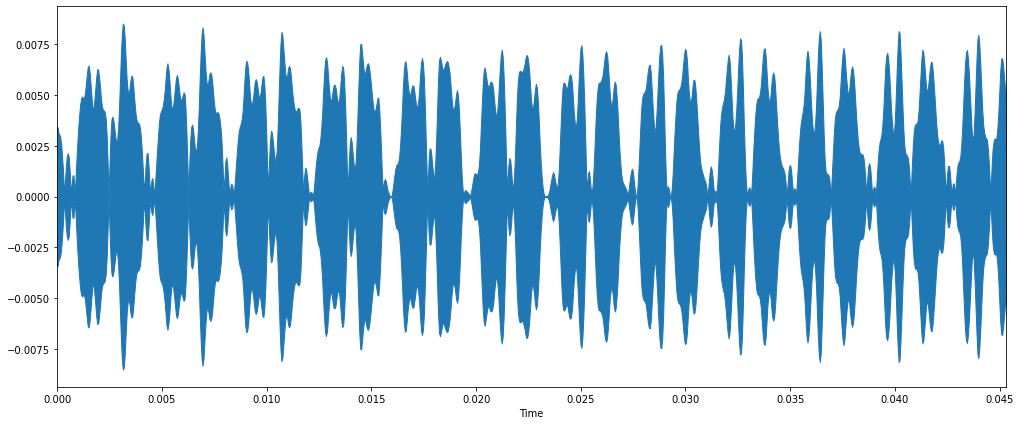

In [6]:
print(len(talk_samples) / sample_rate, 's')
S = 310_000
N = 1000
plt.figure(figsize=(17, 7))
librosa.display.waveplot(talk_samples[S:S+N], sr=sample_rate)

134.26943310657597 s


262.5

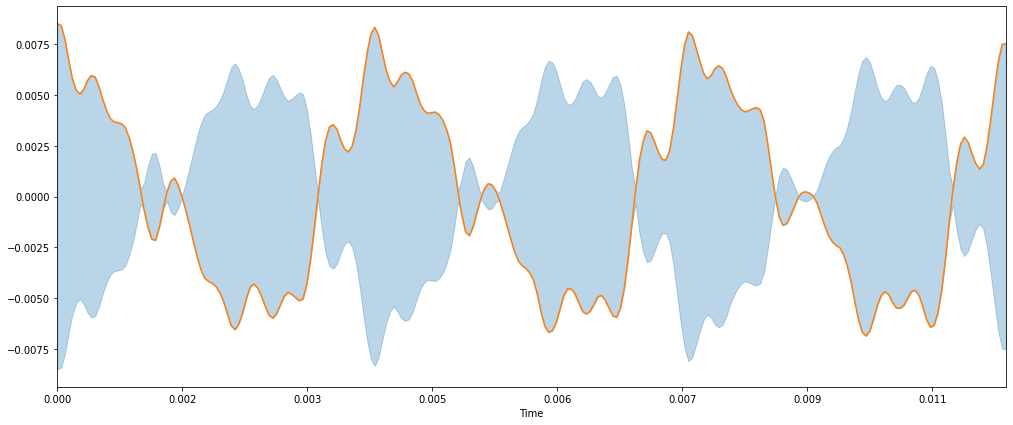

In [7]:
print(len(talk_samples) / sample_rate, 's')
plt.figure(figsize=(17, 7))
S = 310_069
N = 252
librosa.display.waveplot(talk_samples[S:S+N], sr=sample_rate, alpha=0.3)
plt.plot(np.arange(N)/sample_rate, talk_samples[S:S+N])
sample_rate / (252 / 3)

In [8]:
IPython.display.Audio(talk_samples[300_000:360_000], rate=sample_rate)

In [9]:
talk_stft = librosa.stft(talk_samples[300_000:360_000], n_fft=N_FFT)
talk_db = librosa.amplitude_to_db(abs(talk_stft))
talk_samples[300_000:360_000].shape, talk_stft.shape, talk_db.shape

((60000,), (1025, 118), (1025, 118))

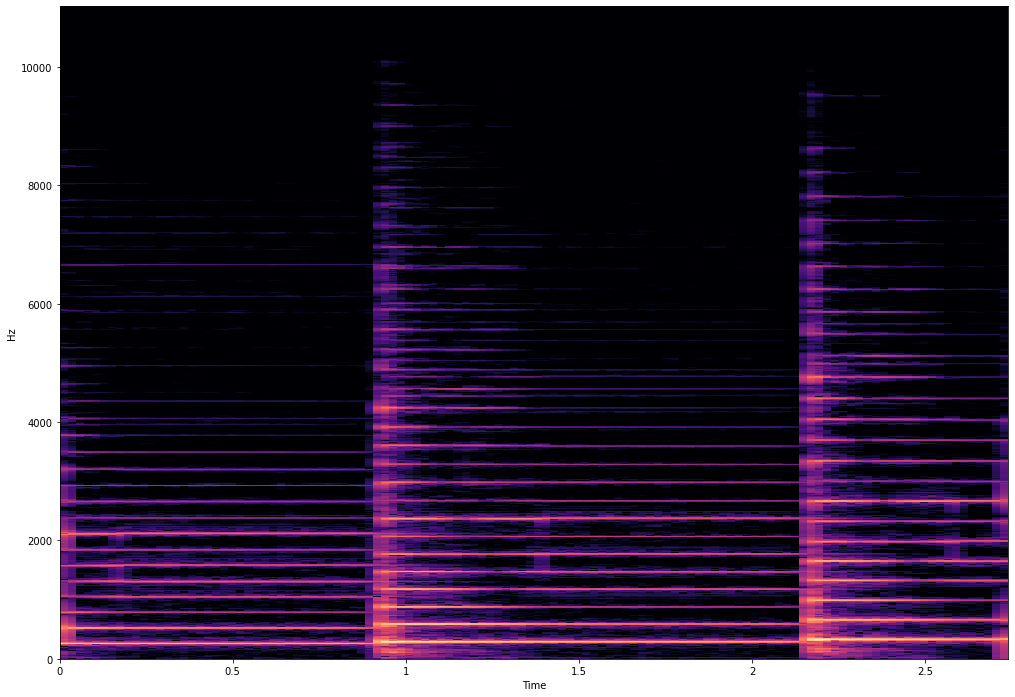

In [10]:
plt.figure(figsize=(17, 12))
librosa.display.specshow(talk_db, sr=sample_rate, x_axis='time', y_axis='hz')

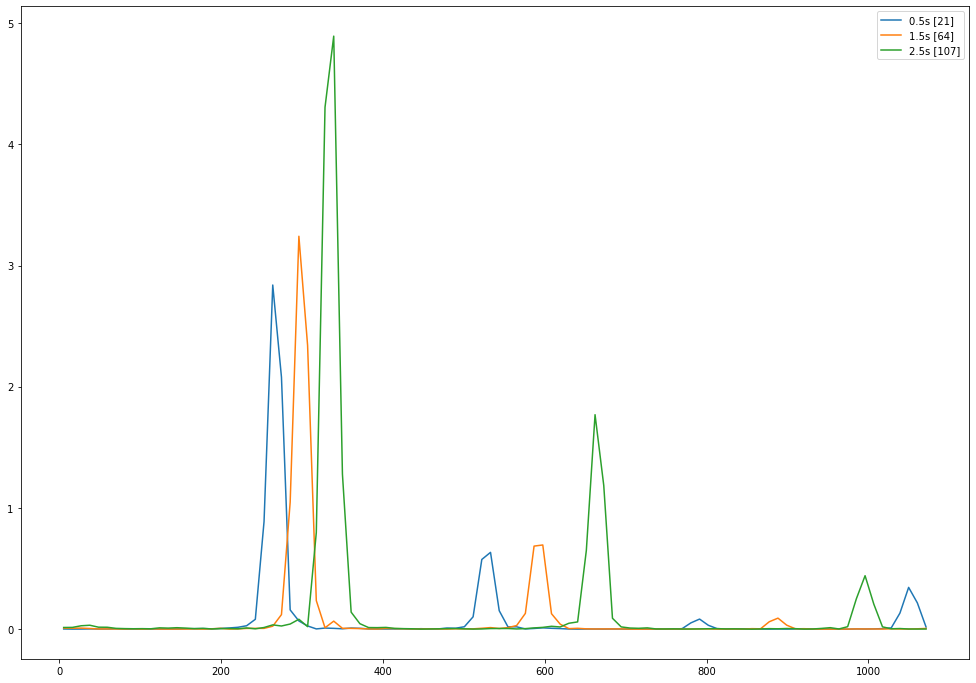

In [11]:
plt.figure(figsize=(17, 12))
xs = (np.arange(len(talk_stft)) + 0.5) * sample_rate / N_FFT
R = slice(None, 100)
for t in [0.5, 1.5, 2.5]:
    fq = int(4 * t * sample_rate / N_FFT)
    plt.plot(xs[R], abs(talk_stft[R, fq]), label=f'{t:.01f}s [{fq}]')
plt.legend()
#plt.plot(xs[R], abs(talk_db[R, 30]))

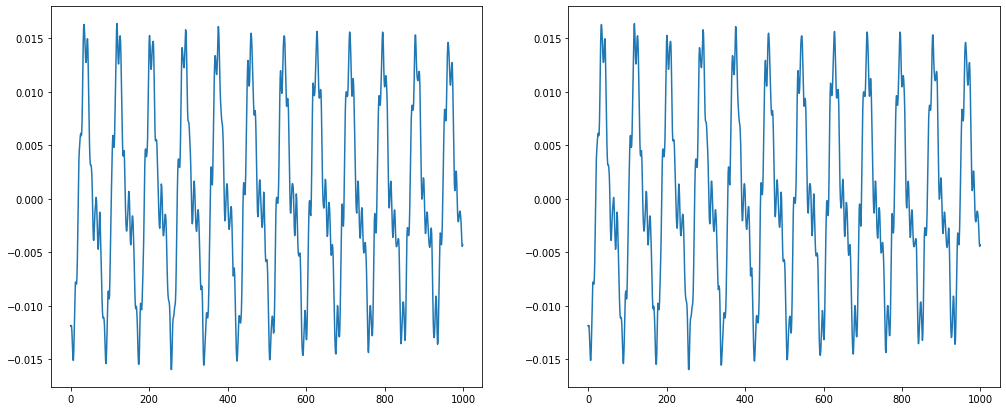

In [12]:
restored_samples = librosa.istft(talk_stft)
plt.figure(figsize=(17, 7))
plt.subplot(121)
plt.plot(talk_samples[300_000:301_000])
plt.subplot(122)
plt.plot(restored_samples[:1_000])

In [13]:
# %time sf.write('output.flac', talk_samples, sample_rate, format='flac', subtype='PCM_24')

In [14]:
%%time
tune_samples, sample_rate = librosa.load('Tuning Note - A-buimPG01gcs.webm')
assert sample_rate == 22050

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


CPU times: user 837 ms, sys: 69.5 ms, total: 907 ms
Wall time: 1.05 s


(438.0794701986755, 439.5348837209303)

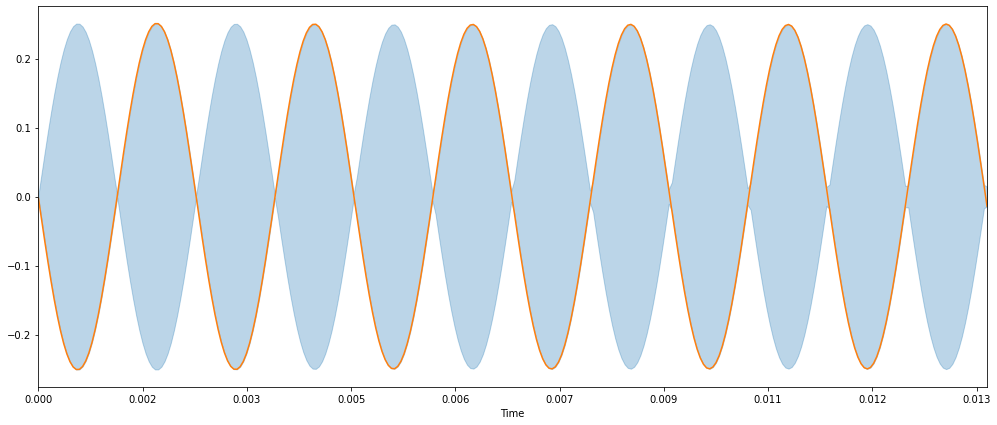

In [15]:
plt.figure(figsize=(17, 7))
S = 200_022
N = 302
librosa.display.waveplot(tune_samples[S:S+N], sr=sample_rate, alpha=0.3)
plt.plot(np.arange(N)/sample_rate, tune_samples[S:S+N])
sample_rate / (302 / 6), sample_rate / (301 / 6)

In [16]:
N_FFT = 2048 * 16
tune_stft = librosa.stft(tune_samples, n_fft=N_FFT)
tune_stft.shape

(16385, 55)

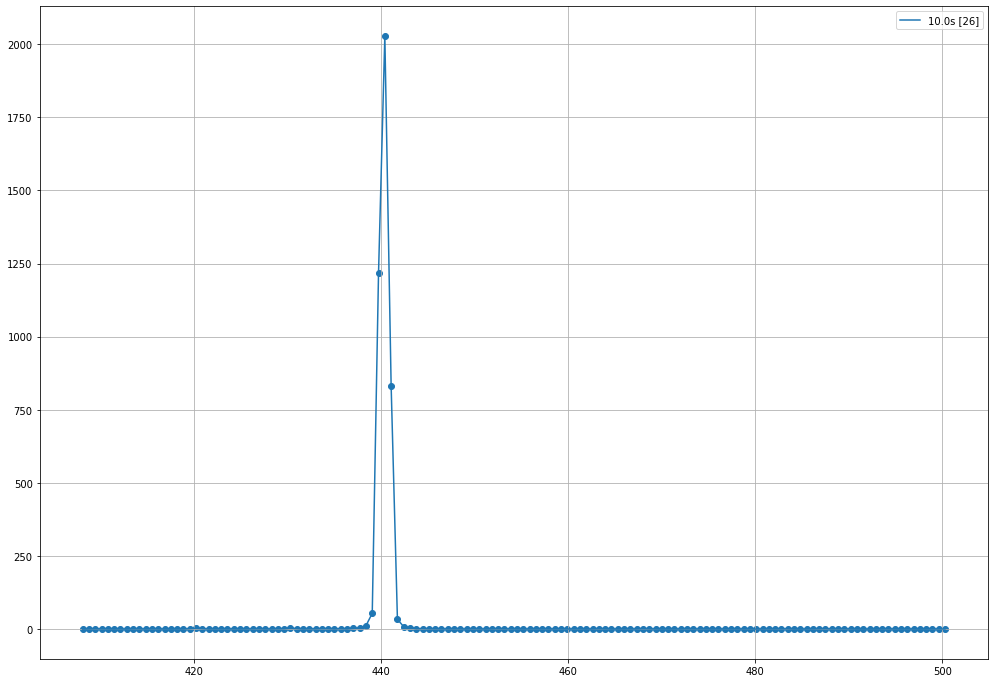

In [17]:
plt.figure(figsize=(17, 12))
plt.grid()
xs = (np.arange(len(tune_stft)) + 0.5) * sample_rate / N_FFT
R = slice(N_FFT // 54, N_FFT // 44)
for t in [10]:
    fq = int(4 * t * sample_rate / N_FFT)
    plt.plot(xs[R], abs(tune_stft[R, fq]), label=f'{t:.01f}s [{fq}]')
    plt.scatter(xs[R], abs(tune_stft[R, fq]))
plt.legend()
#plt.plot(xs[R], abs(talk_db[R, 30]))